# Zomato Data Analysis Using Python

<h3>Step 1: Import necessary Python libraries.</h3>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


<h3>Step 2: Create the data frame.</h3>

In [42]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<h5>Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.</h5>

In [43]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<h5>To obtain a summary of the data frame, you can use the following code-</h5>

In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<h5>We will now examine the data frame for the presence of any null values. This stage scans each column to see whether there are any missing values or empty cells. This allows us to detect any potential data gaps that must be addressed</h5>

<h5>There is no NULL value in dataframe.</h5>

<h5>Let’s explore the listed_in (type) column.</h5>

Text(0.5, 0, 'Type of restaurant')

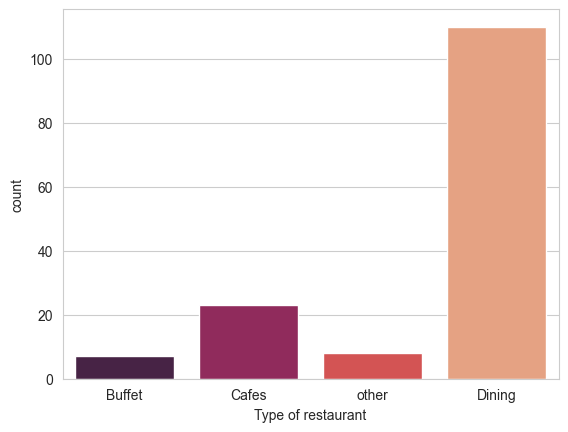

In [45]:
sns.countplot(x=dataframe['listed_in(type)'], palette='rocket')
plt.xlabel("Type of restaurant")

<h5>Conclusion: The majority of the restaurants fall into the dining category.</h5>

Text(0, 0.5, 'Votes')

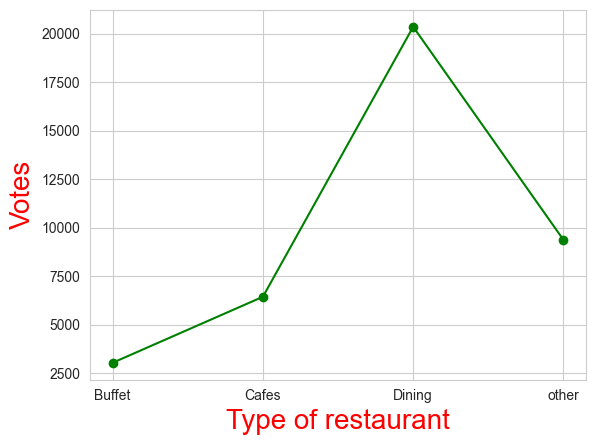

In [46]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

<h5>Conclusion: Dining restaurants are preferred by a larger number of individuals.</h5>

<h5>Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.</h5>

In [55]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<h5>Let’s explore the online_order column.</h5>

<Axes: xlabel='online_order', ylabel='count'>

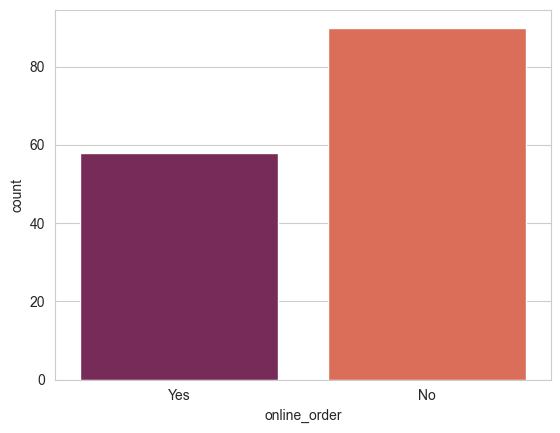

In [48]:
sns.countplot(x=dataframe['online_order'], palette='rocket')

<h5>Conclusion: This suggests that a majority of the restaurants do not accept online orders.</h5>

<h5>Let’s explore the rate column.</h5>

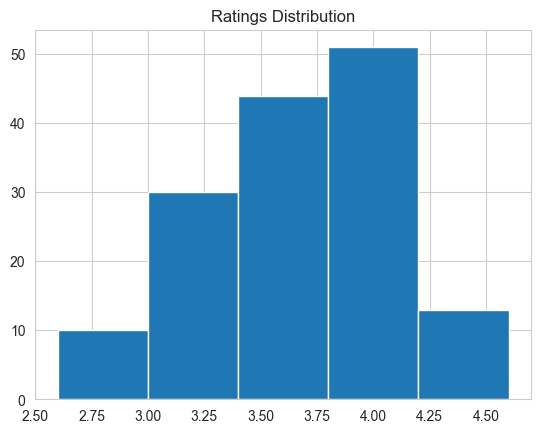

In [49]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<h5>Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.</h5>

<h5>Let’s explore the approx_cost(for two people) column.</h5>

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

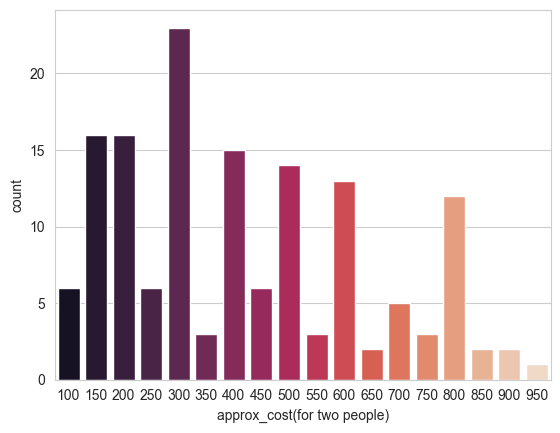

In [50]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette='rocket')

<h5>Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.</h5>

<h5>Now we will examine whether online orders receive higher ratings than offline orders.</h5>

<Axes: xlabel='online_order', ylabel='rate'>

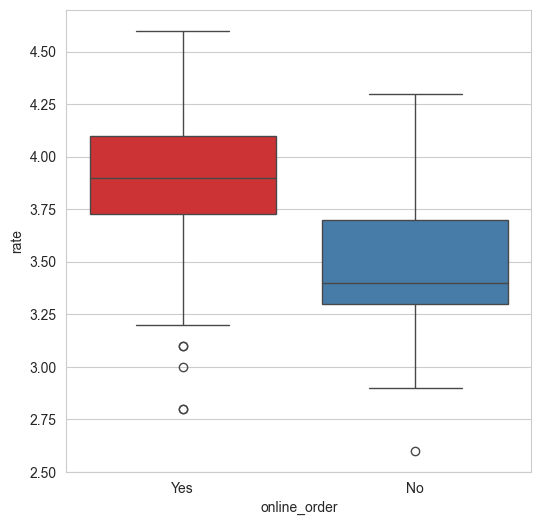

In [52]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette='Set1')

<h5>CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.</h5>

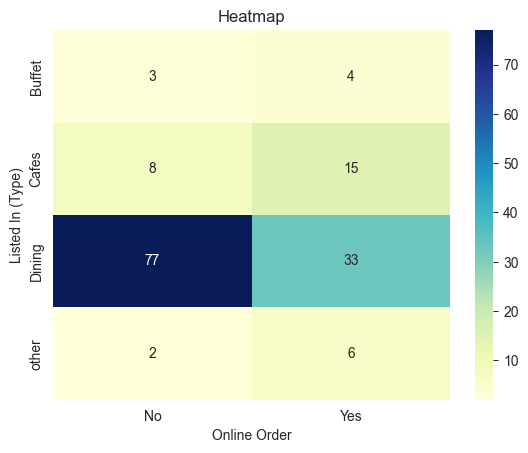

In [53]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

<h5>CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.</h5>